<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/Save%20Image%20With%20Label%20as%20NPZ_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

In [0]:
# Mount google drive

# from google.colab import drive
# drive.mount('/content/gdrive')
# os.listdir('gdrive/My Drive/Colab')

In [8]:
nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

# dataPath = 'gdrive/My Drive/Colab/Data'
dataPath = '''D:/0_Joowhan's Paper/Synthesized/Total/Impulse'''
dataFolderList = os.listdir(dataPath)
dataFolderList = sorted(dataFolderList)
pathFolders = [dataPath + '/' + folder for folder in dataFolderList]
pathFolders = sorted(pathFolders)


for i in range(0, len(pathFolders) - 1):
# for i in range(125):

    imgNpyWithLabel = pathFolders[i] + '/' + dataFolderList[i] + '_Image_With_Label.npy'
        
    if os.path.isfile(imgNpyWithLabel):
        try:
            data = np.load(imgNpyWithLabel)    
            print('Loaded {} Shape: {}'.format(imgNpyWithLabel, data.shape))
            
#             dataFiles = glob.glob(pathFolders[i] + '/*.wav')
            
#             for j in range(len(dataFiles)):
#                  os.remove(dataFiles[j])
            
        except:
            print('Error while loading {}'.format(imgNpyWithLabel))
            os.remove(imgNpyWithLabel)
            print('Removed erroneous file: {}'.format(imgNpyWithLabel))
    else:
        print('{} is not a file'.format(imgNpyWithLabel))
        
        dataFiles = glob.glob(pathFolders[i] + '/*.wav')
        dataFiles = sorted(dataFiles)

        labels = list()
        imgs = np.zeros([len(dataFiles), imgSize, imgSize])

        print("{}: {}".format(pathFolders[i], len(dataFiles)))

        for j in range(len(dataFiles)):

            fs, dataInt16 = wf.read(dataFiles[j])
            dataFloat = dataInt16 / (2 ** 15)
            Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
                               window=np.hamming(nsc), cmap='viridis')
            plt.close()
            img = 10 * np.log10(Pxx[0:imgSize, :])
            imgs[j, :, :] = img

            fileNameWav = dataFiles[j].split('\\')[-1]
            fileName = fileNameWav.replace('.wav', '')
            fileLabels = fileName.split('_')
            label =[float(label[1:]) for label in fileLabels]
#             print(label)
            labels.append(label)

            if(j % 100 == 0):
                print("{}, {}".format(i, j))

        labels = np.asarray(labels)
        imgPack = np.asarray([(imgs[k, :, :], labels[k, 0], labels[k, 1], labels[k, 2]) for k in range(len(dataFiles))])
        np.save(imgNpyWithLabel, imgPack)

        del imgPack
        
        print('Build {}'.format(imgNpyWithLabel))

Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P0N0/P0N0_Image_With_Label.npy Shape: (1000, 4)
D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N1/P1N1_Image_With_Label.npy is not a file
D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N1: 1000
1, 0
1, 100
1, 200
1, 300
1, 400
1, 500
1, 600
1, 700
1, 800
1, 900
Build D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N1/P1N1_Image_With_Label.npy
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N2/P1N2_Image_With_Label.npy Shape: (1000, 4)
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N3/P1N3_Image_With_Label.npy Shape: (1000, 4)
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N4/P1N4_Image_With_Label.npy Shape: (1000, 4)
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P1N5/P1N5_Image_With_Label.npy Shape: (1000, 4)
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P2N1/P2N1_Image_With_Label.npy Shape: (1000, 4)
Loaded D:/0_Joowhan's Paper/Synthesized/Total/Impulse/P2N2/P2N2_Image_With_Label.npy S

In [0]:
dataFolderList

['A1F1P1',
 'A5F3P5',
 'A5F3P3',
 'A5F3P2',
 'A5F3P1',
 'A5F3P4',
 'A5F4P1',
 'A5F5P5',
 'A5F5P1',
 'A5F5P2',
 'A5F5P4',
 'A5F5P3',
 'A5F4P5',
 'A5F4P3',
 'A5F4P4',
 'A5F4P2',
 'A5F2P1',
 'A5F2P2',
 'A5F2P5',
 'A5F2P4',
 'A5F2P3',
 'A4F5P1',
 'A5F1P1',
 'A5F1P2',
 'A5F1P3',
 'A5F1P5',
 'A5F1P4',
 'A4F5P2',
 'A4F5P5',
 'A4F5P4',
 'A4F5P3',
 'A4F3P4',
 'A4F3P3',
 'A4F3P2',
 'A4F3P5',
 'A4F3P1',
 'A4F4P5',
 'A4F2P1',
 'A4F2P5',
 'A4F4P4',
 'A4F4P3',
 'A4F2P4',
 'A4F4P2',
 'A4F2P2',
 'A4F4P1',
 'A4F2P3',
 'A4F1P1',
 'A3F4P3',
 'A3F5P3',
 'A4F1P3',
 'A4F1P2',
 'A4F1P5',
 'A4F1P4',
 'A3F4P2',
 'A3F5P4',
 'A3F5P2',
 'A3F5P5',
 'A3F4P4',
 'A3F5P1',
 'A3F4P1',
 'A3F4P5',
 'A3F2P3',
 'A3F3P1',
 'A3F3P5',
 'A3F3P3',
 'A3F2P1',
 'A3F2P2',
 'A3F2P5',
 'A3F3P4',
 'A3F2P4',
 'A3F3P2',
 'A3F1P3',
 'A3F1P5',
 'A3F1P1',
 'A2F5P4',
 'A3F1P4',
 'A2F5P2',
 'A2F5P5',
 'A2F5P1',
 'A2F5P3',
 'A3F1P2',
 'A2F4P3',
 'A2F3P1',
 'A2F4P4',
 'A2F4P5',
 'A2F3P4',
 'A2F3P3',
 'A2F3P5',
 'A2F3P2',
 'A2F4P2',
 'A2F4P1',

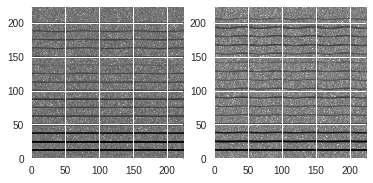

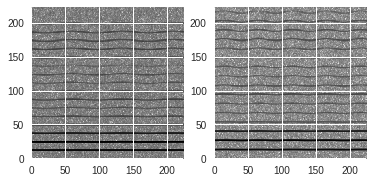

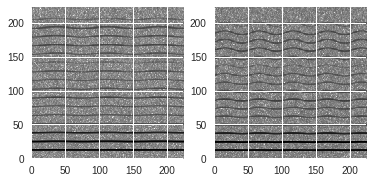

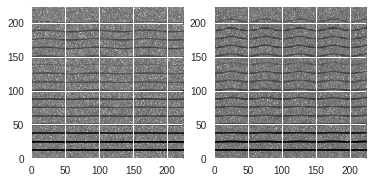

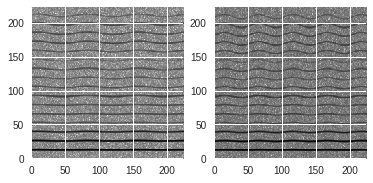

In [0]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.imshow(x[i, 0], origin='lower')
    
    plt.subplot(1, 2, 2)
    plt.imshow(x[-i-1, 0], origin='lower')
    plt.show()